In [5]:
import pandas as pd

In [6]:
testdf = pd.DataFrame(
    {
        "Name": ["Tanish", "Kausthubh", "Modi", "Rahul", "Kejriwal", "Mamta", "Kohli", "Smriti"],
        "Age": [20, 21, 75, 56, 45, 78, 30, 26],
        "Sex": 5*['M'] + ['F'] + ['M', 'F']
    },
)

In [7]:
testdf

,Name,Age,Sex
0,Tanish,20,M
1,Kausthubh,21,M
2,Modi,75,M
3,Rahul,56,M
4,Kejriwal,45,M
5,Mamta,78,F
6,Kohli,30,M
7,Smriti,26,F


In [8]:
testdf.columns

Index(['Name', 'Age', 'Sex'], dtype='object')

<Axes: >

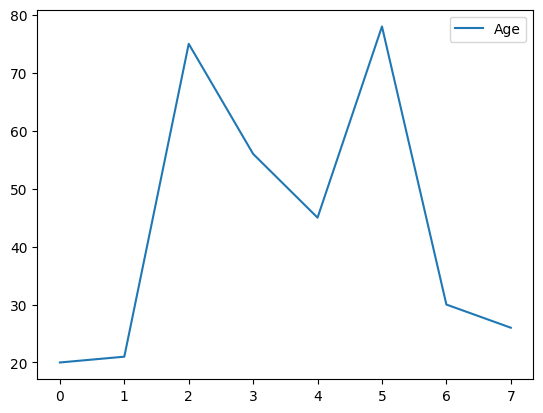

In [9]:
testdf.plot()

In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/m1dataset/screentime_analysis.csv
/kaggle/input/mobiledata/mobile-apps-screentime-analysis


In [11]:
MobileDF = pd.read_csv("/kaggle/input/m1dataset/screentime_analysis.csv", index_col=0)
MobileDF

,App,Usage (minutes),Notifications,Times Opened
Date,,,,
2024-08-07,Instagram,81,24,57
2024-08-08,Instagram,90,30,53
2024-08-26,Instagram,112,33,17
2024-08-22,Instagram,82,11,38
2024-08-12,Instagram,59,47,16
...,...,...,...,...
2024-08-10,LinkedIn,22,12,5
2024-08-23,LinkedIn,5,7,1
2024-08-18,LinkedIn,19,2,5


In [12]:
MobileDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2024-08-07 to 2024-08-02
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   App              200 non-null    object
 1   Usage (minutes)  200 non-null    int64 
 2   Notifications    200 non-null    int64 
 3   Times Opened     200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


<Axes: xlabel='Date'>

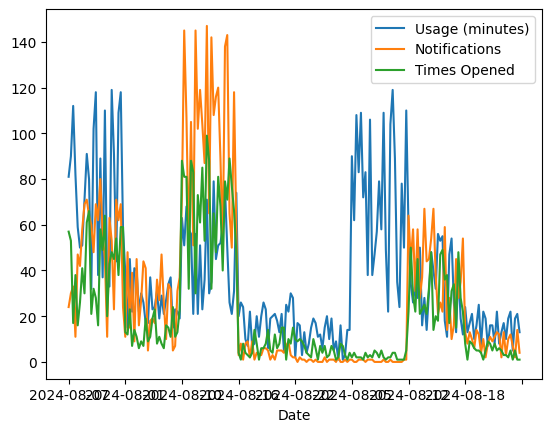

In [13]:
MobileDF.plot()

<Axes: >

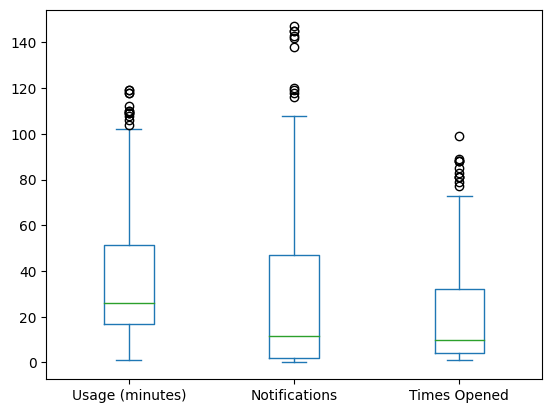

In [14]:
MobileDF.plot.box()

In [15]:
MobileDF['App'].unique()

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [16]:
MobileDF.rename(columns={ 'Usage (minutes)' : 'Usage', 'App' : 'App'}, inplace=True)

In [17]:
MobileDF.columns

Index(['App', 'Usage', 'Notifications', 'Times Opened'], dtype='object')

In [18]:
MobileDF[["App","Notifications"]]

,App,Notifications
Date,,
2024-08-07,Instagram,24
2024-08-08,Instagram,30
2024-08-26,Instagram,33
2024-08-22,Instagram,11
2024-08-12,Instagram,47
...,...,...
2024-08-10,LinkedIn,12
2024-08-23,LinkedIn,7
2024-08-18,LinkedIn,2


In [19]:
MobileDF[MobileDF['Usage'] > MobileDF['Usage'].mean()].shape

(73, 4)

In [20]:
MobileDF['Usage'] > MobileDF['Usage'].mean()

Date
2024-08-07     True
2024-08-08     True
2024-08-26     True
2024-08-22     True
2024-08-12     True
              ...  
2024-08-10    False
2024-08-23    False
2024-08-18    False
2024-08-26    False
2024-08-02    False
Name: Usage, Length: 200, dtype: bool

In [21]:
MobileDF.iloc[0:10, 2:4]

,Notifications,Times Opened
Date,,
2024-08-07,24,57
2024-08-08,30,53
2024-08-26,33,17
2024-08-22,11,38
2024-08-12,47,16
2024-08-28,42,26
2024-08-26,58,41
2024-08-27,69,30
2024-08-15,71,61


In [22]:
# Creating new columns
MobileDF['Unit Usage'] = MobileDF['Usage'] / MobileDF['Times Opened']
MobileDF.head()

,App,Usage,Notifications,Times Opened,Unit Usage
Date,,,,,
2024-08-07,Instagram,81,24,57,1.421053
2024-08-08,Instagram,90,30,53,1.698113
2024-08-26,Instagram,112,33,17,6.588235
2024-08-22,Instagram,82,11,38,2.157895
2024-08-12,Instagram,59,47,16,3.687500


In [23]:
MobileDF["App"].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64